In [1]:
import csv
import numpy

In [2]:
from numpy import genfromtxt
my_data = genfromtxt('ds_feature_all.csv', delimiter='\t')
my_data=my_data[1:,1:]

In [3]:
my_data

array([[4.05898876e-01, 1.16432584e+00, 6.17191011e+01, ...,
        8.58024112e-01, 3.37723738e+01, 0.00000000e+00],
       [9.02654867e-02, 2.46017699e-01, 7.77345133e+01, ...,
        5.68028806e-01, 5.17708362e+01, 0.00000000e+00],
       [6.50000000e-01, 1.46296296e-01, 1.31094444e+02, ...,
        6.10470380e-02, 1.82187024e+01, 2.00000000e+00],
       ...,
       [1.23222749e-01, 3.03317536e-01, 9.98009479e+01, ...,
        1.42075028e-01, 5.62190316e+01, 0.00000000e+00],
       [2.12765957e-01, 2.34042553e-01, 7.66170213e+01, ...,
        1.02966660e-01, 3.29197606e+01, 0.00000000e+00],
       [3.24290999e-01, 1.75092478e-01, 1.01583231e+02, ...,
        1.23648069e+00, 5.60006514e+01, 1.00000000e+00]])

In [4]:
columns = [   'ratio_retweets',
              'hashtags',
              'length',
              'exclamations',
              'questions',
              'links',
              'topicRepetition',
              'replies',
              'spreadVelocity',
              'user_diversity',
              'retweeted_user_diversity',
              'hashtag_diversity',
              'language_diversity',
              'vocabulary_diversity',
              'class']

In [5]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# Importing the dataset
dataset = pd.DataFrame(my_data, columns=columns)
X = dataset.iloc[:,0:-1].values
y = dataset.iloc[:, 14].values

# SVM and Gaussian Process Classifier

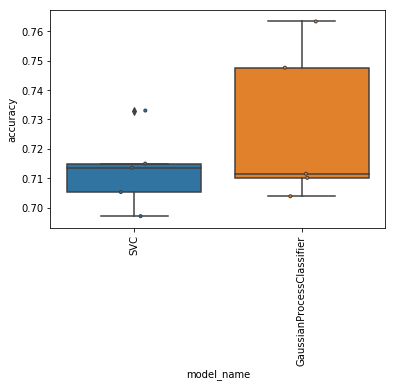

model_name
GaussianProcessClassifier    0.727285
SVC                          0.712801
Name: accuracy, dtype: float64


In [7]:
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.model_selection import cross_val_score
from sklearn.gaussian_process.kernels import RBF
models = [
#    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    SVC(kernel = 'linear'),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,
              size=3, jitter=True, edgecolor="gray", linewidth=1)
plt.show()

print(cv_df.groupby('model_name').accuracy.mean())

# compare

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
models = [
#    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    SGDClassifier(loss="hinge", penalty="l2"),
#    MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1),
    KNeighborsClassifier(3),
    SVC(kernel="linear"),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,
              size=3, jitter=True, edgecolor="gray", linewidth=1)
plt.xticks(rotation=90)
plt.show()

print(cv_df.groupby('model_name').accuracy.mean())